In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta

## 11.1 日期和时间数据类型及工具

In [2]:
now = datetime.now()
now

datetime.datetime(2019, 8, 8, 14, 35, 49, 396955)

In [3]:
now.year, now.month, now.day

(2019, 8, 8)

In [4]:
# datetime以毫秒形式存储日期和时间。
# timedelta表示这两个datetime对象之间的时间差

delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [5]:
delta

datetime.timedelta(days=926, seconds=56700)

In [6]:
delta.days

926

In [7]:
delta.seconds

56700

In [8]:
# 可以给datetime对象加上（或减去）一个或多个timedelta,这样会产生一个新对象

start = datetime(2011, 1, 7)

In [9]:
start + timedelta(12)  # 12 days ?

datetime.datetime(2011, 1, 19, 0, 0)

In [10]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [11]:
%%html
<img src="picture/表11-1 datetime模块中的数据类型.png">

### 11.1.1 字符串和datetime的相互转换

In [48]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse

In [31]:
# 利用str或strftime方法（传入一个格式化字符串），datetime对象和pandas的Timestamp对象可以被格式化为字符串

stamp = datetime(2011, 1, 3)
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [32]:
str(stamp)

'2011-01-03 00:00:00'

In [40]:
# stamp.strftime('%Y: %m: %d')

stamp.strftime('%Y-%m-%d')

# stamp.strftime("%F")

'2011-01-03'

In [41]:
%%html
<img src="picture/表11-2 datetime格式定义（兼容ISO C89）（1）.png">
<img src="picture/表11-2 datetime格式定义（兼容ISO C89）（2）.png">

In [42]:
# datetime.strptime：将【字符串】转换为【日期】

value = '2011-01-03'

In [45]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [46]:
datestrs = ['7/6/2011', '8/6/2011']

In [47]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [49]:
# 利用dateutil对日期进行解析


from dateutil.parser import parse

parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [50]:
# dateutil可以解析几乎所有人类能够理解的日期表示形式

parse('Jan 31, 1997, 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [51]:
# dayfirst = True：可解决日出现在月前面的情况

parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [52]:
# pd.to_datetime(): 可以解析多种不同的日期表示形式

datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [53]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [54]:
# pd.to_datetime(): 还可以处理缺失值（None、空字符串等）

idx = pd.to_datetime(datestrs + [None])

In [55]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [56]:
# NaT(Not a Time)是pandas中时间戳的null值

idx[2]

NaT

In [39]:
pd.isnull(idx)

array([False, False,  True])

In [57]:
%%html
<img src="picture/表11-3 特定于当前环境的日期格式.png">

## 11.2 时间序列基础

In [58]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta

In [59]:
# pandas最基本的时间序列类型：以时间戳（通常以Python字符串或datetime对象表示）为索引的Series

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [60]:
ts = pd.Series(np.random.randn(6), index=dates)

In [61]:
ts

2011-01-02    0.117528
2011-01-05   -0.387471
2011-01-07   -1.923490
2011-01-08   -1.489916
2011-01-10    0.721142
2011-01-12   -0.543977
dtype: float64

In [7]:
# 这这些datetime对象，实际上被放在一个DatetimeIndex中

ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [8]:
# 跟其他Series一样，不同索引的时间序列之间的算术运算会自动按日期对齐
# ts[ : : 2] 每隔两个取一个

ts + ts[ : : 2]

2011-01-02    0.606081
2011-01-05         NaN
2011-01-07    0.146945
2011-01-08         NaN
2011-01-10    0.420962
2011-01-12         NaN
dtype: float64

In [9]:
# pandas用NumPy的datetime64数据类型以【纳秒(ns)】的形式存储时间戳

ts.index.dtype

dtype('<M8[ns]')

In [10]:
# DatetimeIndex中的各个标量值是pandas的Timestamp对象

stamp = ts.index[0]

In [11]:
stamp

Timestamp('2011-01-02 00:00:00')

## 11.2.1 索引、选取、子集构造

In [73]:
# 当根据标签索引选取数据时，时间序列和其它的pandas.Series很象

stamp = ts.index[2]

In [74]:
ts[stamp]

-1.9234895908414615

In [75]:
# 传入一个可以被解释为日期的字符串

ts['1/10/2011']

0.7211423930413394

In [76]:
ts['20110110']

0.7211423930413394

In [77]:
# 对于较长的时间序列，只需传入“年”或“年月”即可轻松选取数据的切片

longer_ts = pd.Series(np.random.randn(1000),
                     index=pd.date_range('1/1/2000', periods=1000))

In [79]:
longer_ts.head()

2000-01-01   -0.629713
2000-01-02    0.930681
2000-01-03   -0.351706
2000-01-04    1.403444
2000-01-05   -0.827194
Freq: D, dtype: float64

In [80]:
longer_ts['2001'].head()

2001-01-01   -0.557468
2001-01-02    0.942721
2001-01-03   -0.576132
2001-01-04    1.039273
2001-01-05    0.527823
Freq: D, dtype: float64

In [81]:
# 上面，字符串“2001”被解释为年，并根据它选取时间区间
# 指定【月】也同样奏效

longer_ts['2001-05'].head()

2001-05-01    0.170234
2001-05-02   -1.355933
2001-05-03    1.121230
2001-05-04   -0.074994
2001-05-05   -1.523448
Freq: D, dtype: float64

In [84]:
# datetime对象也可以进行【切片】

ts[datetime(2011, 1, 7)]

-1.9234895908414615

In [85]:
# 由于大部分时间序列数据都是按照时间先后排序的，
# 因此，也可以用不存在于该时间序列中时间戳进行切片

ts

2011-01-02    0.117528
2011-01-05   -0.387471
2011-01-07   -1.923490
2011-01-08   -1.489916
2011-01-10    0.721142
2011-01-12   -0.543977
dtype: float64

In [86]:
ts['1/6/2011': '1/11/2011']

2011-01-07   -1.923490
2011-01-08   -1.489916
2011-01-10    0.721142
dtype: float64

In [87]:
# 另一个截取两个日期之间TimeSeries的方法

ts.truncate(after='1/9/2011')

2011-01-02    0.117528
2011-01-05   -0.387471
2011-01-07   -1.923490
2011-01-08   -1.489916
dtype: float64

In [88]:
# 上面那些操作对DataFrame也有效
# 对DataFrame的【行】进行索引

dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [89]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                      index=dates,
                      columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [90]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.136384,1.206890,0.585976,0.427249
2001-05-09,-0.224632,1.520524,-0.399837,0.664584
2001-05-16,-0.733335,1.002875,1.055283,1.361896
2001-05-23,-0.789276,-1.166282,-0.343731,-0.996555
2001-05-30,-0.253833,-0.841686,-0.064463,0.653212


## 11.2.2 带有重复索引的时间序列

In [91]:
# 在某些应用场景中，可能会存在多个观测数据落在同一个时间点上的情况

dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])

In [92]:
dup_ts = pd.Series(np.arange(5), index=dates)

In [93]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [94]:
# is_unique: 检查唯一性

dup_ts.index.is_unique

False

In [95]:
# 对其进行【索引】，产生标量值，或切片

dup_ts['1/3/2000']  # 不重复

4

In [96]:
dup_ts['1/2/2000']  # 重复

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [97]:
# 对具有非唯一时间戳的数据进行聚合：使用groupby,并传入level=0

grouped = dup_ts.groupby(level=0)

In [98]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [99]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3 时间的范围、频率以及移动

In [100]:
# pandas有一整套标准时间序列频率以及用于重采样、频率推断、生成固定频率日期范围的工具
# 如：可以将之前那个时间序列转换为一个具有固定频率（每日）的时间序列，只需调用resample即可

ts

2011-01-02    0.117528
2011-01-05   -0.387471
2011-01-07   -1.923490
2011-01-08   -1.489916
2011-01-10    0.721142
2011-01-12   -0.543977
dtype: float64

In [101]:
resampler = ts.resample("D")  # D:每天

In [102]:
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

## 11.3.1 生成日期范围

In [103]:
# pandas.date_range():可用于根据指定的频率生成指定长度的DatetimeIndex
# 默认情况下，date_range():会产生按天计算的时间点

index = pd.date_range('2012-04-01', '2012-06-01')

In [104]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [105]:
# 如果只传入【起始】或【结束】日期，那就还得传入一个表示一片时间的数字

pd.date_range(start='2012-04-01', periods=20)  # periods:天数

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [53]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [56]:
# 【起始】和【结束】日期定义了日期索引的严格边界
# 例如：如果想要生成一个由【每月最后一个工作日】组成的日期索引，可以传入“BM”频率（表示business end of month,表11-4是频率列表），
#       这样就只会包含时间间隔内（或刚好在边界上的）符合频率要求的时期

pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [106]:
%%html
<img src="picture/表11-4 基本的时间序列频率(1).png">
<img src="picture/表11-4 基本的时间序列频率(2).png">
<img src="picture/表11-4 基本的时间序列频率(3).png">

In [107]:
# date_range():默认会保留起始和结束时间戳的时间信息（如果有的话）

pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [108]:
# 有时，虽然【起始】和【结束】日期带有时间信息，但你希望产生一组被规范化(normalize)到午夜的时间戳
# 可由 normalize选项实现

pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## 11.3.2 频率和日期偏移量

In [109]:
# pandas中的频率是由一个基础频率（base frequency）和一个乘数组成的。
# 基础频率通常以一个字符串别名表示，比如"M"表示每月，"H"表示每小时。
# 对于每个基础频率，都有一个被称为日期偏移量（date offset）的对象与之对应。
# 例如，按小时计算的频率可以用Hour类表示：

from pandas.tseries.offsets import Hour, Minute

In [110]:
hour = Hour()

In [111]:
hour

<Hour>

In [112]:
# 传入一个整数即可定义偏移量的倍数

four_hours = Hour(4)

In [113]:
four_hours

<4 * Hours>

In [114]:
# 在基础频率前面放上一个整数即可创建倍数

pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [115]:
# 大部分偏移量都可通过加法进行连接

Hour(2) + Minute(30)

<150 * Minutes>

In [116]:
# 同时，也可以传入频率字符串（如“2h30min”）
# 这样字符串可以被高效地解析为等效的表达式

pd.date_range('2000-01-01', periods=10, freq='2h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 02:30:00',
               '2000-01-01 05:00:00', '2000-01-01 07:30:00',
               '2000-01-01 10:00:00', '2000-01-01 12:30:00',
               '2000-01-01 15:00:00', '2000-01-01 17:30:00',
               '2000-01-01 20:00:00', '2000-01-01 22:30:00'],
              dtype='datetime64[ns]', freq='150T')

In [117]:
%%html
<img src="picture/表11-4 时间序列的基础频率(1).png">
<img src="picture/表11-4 时间序列的基础频率(2).png">
<img src="picture/表11-4 时间序列的基础频率(3).png">

## 11.3.3 WOM日期

In [118]:
# WOM(Week Of Month)是一种非常实用的频率类，以WOM开关
# 使你能获得诸如“每月第3个星期五”之类的日期

rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [119]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

## 11.3.4 移动（超前和滞后）数据

In [120]:
# 移动(shifting)：沿着时间轴将数据前移或后移
# Series和DataFrame都有一个shift方法用于执行单纯的前移或后移操作，保持索引不变

ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [121]:
ts

2000-01-31    1.049113
2000-02-29   -0.277376
2000-03-31    0.286207
2000-04-30    0.185004
Freq: M, dtype: float64

In [122]:
# 当我们这样进行移动时，就会在时间序列的前面或后面产生缺失数据

ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.049113
2000-04-30   -0.277376
Freq: M, dtype: float64

In [123]:
ts.shift(-2)

2000-01-31    0.286207
2000-02-29    0.185004
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [124]:
# shift：通常用于计算一个时间序列或多个时间序列（如DataFrame的列）中的百分比变化

ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -1.264391
2000-03-31   -2.031834
2000-04-30   -0.353601
Freq: M, dtype: float64

In [125]:
# 由于单纯的移位操作不会修改索引，所以部分数据会被丢弃。
# 因此，如果频率已知，则可以将其传给shift以便实现【对时间戳进行位移】而不是对数据进行简单位移：

ts.shift(2, freq='M')

2000-03-31    1.049113
2000-04-30   -0.277376
2000-05-31    0.286207
2000-06-30    0.185004
Freq: M, dtype: float64

In [126]:
# 这里还可以使用其他频率，于是你就能非常灵活地对数据进行超前和滞后处理了：

ts.shift(3, freq='D')

2000-02-03    1.049113
2000-03-03   -0.277376
2000-04-03    0.286207
2000-05-03    0.185004
dtype: float64

In [127]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    1.049113
2000-02-29 01:30:00   -0.277376
2000-03-31 01:30:00    0.286207
2000-04-30 01:30:00    0.185004
Freq: M, dtype: float64

## 11.3.5 通过偏移量对日期进行位移

In [128]:
# pandas的日期偏移量还可以用在datetime或Timestamp对象上

from pandas.tseries.offsets import Day, MonthEnd

In [129]:
now = datetime(2011, 11, 17)

In [130]:
now + 3*Day()

Timestamp('2011-11-20 00:00:00')

In [131]:
# 如果加的是锚点偏移量（比如MonthEnd），第一次增量会将原日期向前滚动到符合频率规则的下一个日期

now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [132]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [133]:
# 通过锚点偏移量的rollfroward or rollback方法，可明确地将日期向前或身后“游动”

offset = MonthEnd()

In [134]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [135]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [136]:
# 还可结合groupby，使用这两个“滚动”方法

ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [137]:
ts

2000-01-15   -1.281223
2000-01-19   -0.108171
2000-01-23    0.574072
2000-01-27   -0.637839
2000-01-31    0.691431
2000-02-04   -0.406499
2000-02-08    0.619517
2000-02-12   -0.321950
2000-02-16    0.857689
2000-02-20   -0.310520
2000-02-24   -0.158562
2000-02-28   -0.561704
2000-03-03   -0.907014
2000-03-07   -0.865063
2000-03-11   -0.537026
2000-03-15   -0.664494
2000-03-19    1.320738
2000-03-23   -1.737383
2000-03-27   -0.448405
2000-03-31    0.363075
Freq: 4D, dtype: float64

In [138]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.152346
2000-02-29   -0.040290
2000-03-31   -0.434446
dtype: float64

In [139]:
# 也可使用resample

ts.resample('M').mean()

2000-01-31   -0.152346
2000-02-29   -0.040290
2000-03-31   -0.434446
Freq: M, dtype: float64

# 11.4 时区处理

In [140]:
import pytz

In [106]:
pytz.common_timezones[-5: ]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [107]:
# 要从pytz中获取时区对象，使用pytz.timezone即可

tz = pytz.timezone('America/New_York')

In [108]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

## 11.4.1 时区本地化和转换

In [3]:
# 默认情况下，pandas中的时间序列是单纯(naive)的时区

rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [4]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [5]:
ts

2012-03-09 09:30:00   -1.079959
2012-03-10 09:30:00   -0.765579
2012-03-11 09:30:00    0.556414
2012-03-12 09:30:00    0.252214
2012-03-13 09:30:00   -2.052752
2012-03-14 09:30:00   -0.600095
Freq: D, dtype: float64

In [8]:
# 其索引的tz字段为None

print(ts.index.tz)

None


In [9]:
# 可以用时区集生成日期范围

pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [10]:
# instance.tz_localize(): 从单纯到本地化的转换

ts

2012-03-09 09:30:00   -1.079959
2012-03-10 09:30:00   -0.765579
2012-03-11 09:30:00    0.556414
2012-03-12 09:30:00    0.252214
2012-03-13 09:30:00   -2.052752
2012-03-14 09:30:00   -0.600095
Freq: D, dtype: float64

In [11]:
ts_utc = ts.tz_localize("UTC")

In [12]:
ts_utc

2012-03-09 09:30:00+00:00   -1.079959
2012-03-10 09:30:00+00:00   -0.765579
2012-03-11 09:30:00+00:00    0.556414
2012-03-12 09:30:00+00:00    0.252214
2012-03-13 09:30:00+00:00   -2.052752
2012-03-14 09:30:00+00:00   -0.600095
Freq: D, dtype: float64

In [13]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [14]:
# 一旦时间序列被本地化到某个特定时区，就可以用tz_convert将其转换到别的时区

ts_utc.tz_convert("America/New_York")

2012-03-09 04:30:00-05:00   -1.079959
2012-03-10 04:30:00-05:00   -0.765579
2012-03-11 05:30:00-04:00    0.556414
2012-03-12 05:30:00-04:00    0.252214
2012-03-13 05:30:00-04:00   -2.052752
2012-03-14 05:30:00-04:00   -0.600095
Freq: D, dtype: float64

In [15]:
# 对于上面这种时间序列（它跨越了美国东部时间的夏令时转变期），
# 我们可以将其本地化到EST，然后转换为UTC或柏林时间

ts_eastern = ts.tz_localize('America/New_York')

In [16]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -1.079959
2012-03-10 14:30:00+00:00   -0.765579
2012-03-11 13:30:00+00:00    0.556414
2012-03-12 13:30:00+00:00    0.252214
2012-03-13 13:30:00+00:00   -2.052752
2012-03-14 13:30:00+00:00   -0.600095
Freq: D, dtype: float64

In [17]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -1.079959
2012-03-10 15:30:00+01:00   -0.765579
2012-03-11 14:30:00+01:00    0.556414
2012-03-12 14:30:00+01:00    0.252214
2012-03-13 14:30:00+01:00   -2.052752
2012-03-14 14:30:00+01:00   -0.600095
Freq: D, dtype: float64

In [18]:
# tz_localize or tz_convert 也是DatetimeIndex的实例方法

ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

## 11.4.2 操作时区意识型Timestamp对象

In [19]:
# 跟时间序列和日期范围差不多，独立的Timestamp对象也能被从单纯型（naive）本地化
# 为时区意识型（time zone-aware），并从一个时区转换到另一个时区：

stamp = pd.Timestamp('2011-03-12 04:00')

In [20]:
stamp_utc = stamp.tz_localize('utc')

In [21]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [22]:
# 在创建Timestamp时，还可以传入一个时区信息

stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')

In [23]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [24]:
# 时区意识型Timestamp对象在内部保存了一个UTC时间戳值（自UNIX纪元（1970年1月1日）算起的纳秒数）。
# 这个UTC值在时区转换过程中是不会发生变化的：

stamp_utc.value

1299902400000000000

In [25]:
stamp_utc.tz_convert("America/New_York").value

1299902400000000000

In [26]:
# 当使用pandas的DateOffset对象执行时间算术运算时，运算过程会自动关注是否存在夏令时转变期。
# 这里，我们创建了在DST转变之前的时间戳。首先，来看夏令时转变前的30分钟：

from pandas.tseries.offsets import Hour

In [27]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')

In [28]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [29]:
# 然后，夏令时转变前90分钟

stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')

In [30]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [31]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

## 11.4.3 不同时区之间的运算

In [32]:
# 如果两个时间序列的时区不同，在将它们合并到一起时，最终结果就会是UTC。
# 由于时间戳其实是以UTC存储的，所以这是一个很简单的运算，并不需要发生任何转换：

rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

In [33]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [34]:
ts

2012-03-07 09:30:00    0.507473
2012-03-08 09:30:00    0.310779
2012-03-09 09:30:00    0.563389
2012-03-12 09:30:00   -1.471313
2012-03-13 09:30:00   -0.702389
2012-03-14 09:30:00    1.184354
2012-03-15 09:30:00   -0.668186
2012-03-16 09:30:00   -0.590806
2012-03-19 09:30:00    0.103181
2012-03-20 09:30:00    0.069588
Freq: B, dtype: float64

In [35]:
ts1 = ts[ : 7].tz_localize('Europe/London')

In [36]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [37]:
result = ts1 + ts2

In [38]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

# 11.5 时期及其算术运算

In [39]:
# 时期(period):时间区间，比如数日、数月、数年等

p = pd.Period(2007, freq='A-DEC')

In [40]:
# 这个period对象表示的是从2007年1月1日到2007年12月31日之间的整段时间

p

Period('2007', 'A-DEC')

In [41]:
# 只需对period对象加上或减去一个整数即可达到根据频率进行位移的效果

p + 5

Period('2012', 'A-DEC')

In [42]:
p - 2

Period('2005', 'A-DEC')

In [44]:
# 如果两个Period对象拥有相同的频率，则它们的差就是它们之间的单位数量

q = pd.Period('2014', freq='A-DEC')
q - p

<7 * YearEnds: month=12>

In [45]:
# pandas.period_range():可用于创建规则的时间范围

rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')

In [46]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [47]:
# PeriodIndex类保存了一组Period
# 它可以在任何pandas数据结构中被用作轴索引

pd.Series(np.random.randn(6), index=rng)

2000-01    0.497436
2000-02    1.338488
2000-03   -0.623388
2000-04    2.726469
2000-05    1.258293
2000-06   -1.379182
Freq: M, dtype: float64

In [48]:
# 如果有一个字符串数组，也可以使用PeriodIndex类

values = ['2001Q3', '2002Q2', '2003Q1']

In [49]:
index = pd.PeriodIndex(values, freq='Q-DEC')

In [50]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

## 11.5.1 时期的频率转换

In [51]:
p = pd.Period("2007", freq="A-DEC")

In [52]:
p

Period('2007', 'A-DEC')

In [53]:
# Period and PeriodIndex 对象都可以通过其 asfreq 方法被转换成别的频率 

p.asfreq("M", how="start")

Period('2007-01', 'M')

In [54]:
p.asfreq("M", how='end')

Period('2007-12', 'M')

In [58]:
# 可以将 Period("2007", "A-DEC") 看作一个被划分为多个月度时期的时间段中的游标

In [60]:
%%html
<img src="picture/图11-1 Period频率转换示例.png", width=600>

In [63]:
# 对于一个不以 12 月结束的财政年度，月度子时期归属情况就不一样了

p = pd.Period("2007", freq="A-JUN")
p

Period('2007', 'A-JUN')

In [64]:
p.asfreq("M", 'start')

Period('2006-07', 'M')

In [65]:
p.asfreq("M", 'end')

Period('2007-06', 'M')

In [66]:
# 在将高频率转换为低频率时，超时期(superperiod)是由子时期(subperiod)所属的位置决定的
# 例如，在 A-JUN频率中，月份 "2007年8月"实际上是属于周期 "2008年"的

p = pd.Period("Aug-2007", 'M')

In [67]:
p.asfreq("A-JUN")

Period('2008', 'A-JUN')

In [68]:
# 完整的 PeriodIndex or TimeSeries 的频率转换方式也是如此

rng = pd.period_range('2006', '2009', freq='A-DEC')

In [70]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [71]:
ts

2006   -0.295126
2007   -0.433609
2008    0.055795
2009   -0.640991
Freq: A-DEC, dtype: float64

In [75]:
# 根据年度时期的第一个月，每年的时期被取代为每月的时期

ts.asfreq("M", how='start')

2006-01   -0.295126
2007-01   -0.433609
2008-01    0.055795
2009-01   -0.640991
Freq: M, dtype: float64

In [76]:
# 使用"B"频率：取得每年的最后一个工作日

ts.asfreq("B", how='end')

2006-12-29   -0.295126
2007-12-31   -0.433609
2008-12-31    0.055795
2009-12-31   -0.640991
Freq: B, dtype: float64

### 11.5.2 按季度计算的时期频率

In [78]:
# pandas 支持 12 种可能的季度型频率，即 Q-JAN 到 Q-DEC

p = pd.Period("2012Q4", freq="Q-JAN")
p

Period('2012Q4', 'Q-JAN')

In [81]:
# 在以 1 月结束的财年财年中，2012Q4 是从 2011-11 月到 2012-1 月

p.asfreq("D", 'start')

Period('2011-11-01', 'D')

In [82]:
p.asfreq("D", 'end')

Period('2012-01-31', 'D')

In [84]:
%%html
<img src="picture/图11.2 不同季度型频率之间的转换.png", width=600>

In [85]:
# 因此，Period 之间的算术运算会非常简单。
# 例如，要获取该季度倒数第二个工作日下午4点的时间戳时间戳

p4pm = (p.asfreq("B", 'e') - 1).asfreq("T", 's') + 16*60

In [86]:
p4pm

Period('2012-01-30 16:00', 'T')

In [87]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [88]:
# period_range 可用于生成季度型范围
# 季度型范围的算术运算同上

rng = pd.period_range("2011Q3", "2012Q4", freq="Q-JAN")

In [89]:
ts = pd.Series(np.arange(len(rng)), index=rng)

In [90]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [91]:
new_rng = (rng.asfreq("B", 'e') - 1).asfreq("T", 's') + 16 * 60

In [92]:
ts.index = new_rng.to_timestamp()

In [93]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### 11.5.3 将时间戳转换为区间（以及逆转换）

通过使用 to_period 方法，可以将时间戳索引的 Series 和 DataFrame 对象转换为时期索引

In [4]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [5]:
ts = pd.Series(np.random.randn(3), index=rng)

In [6]:
ts

2000-01-31    0.347404
2000-02-29   -0.505396
2000-03-31    0.205425
Freq: M, dtype: float64

In [7]:
pts = ts.to_period()

In [8]:
pts

2000-01    0.347404
2000-02   -0.505396
2000-03    0.205425
Freq: M, dtype: float64

由于时期指的是非重叠时间区间，因此对于给定的频率，一个时间戳只能属于一个时期。  
新 PeriodIndex 的频率默认是从时间戳推断而来的，也可以指定任何别的频率  
结果中允许存在重复日期

In [9]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [10]:
ts2 = pd.Series(np.random.randn(6), index=rng)

In [11]:
ts2

2000-01-29    0.095517
2000-01-30    0.203417
2000-01-31   -0.527574
2000-02-01    0.094691
2000-02-02   -0.423083
2000-02-03   -0.380817
Freq: D, dtype: float64

In [12]:
ts2.to_period("M")

2000-01    0.095517
2000-01    0.203417
2000-01   -0.527574
2000-02    0.094691
2000-02   -0.423083
2000-02   -0.380817
Freq: M, dtype: float64

要转回时间戳，使用 to_timestamp 即可

In [13]:
pts = ts2.to_period()

In [16]:
pts

2000-01-29    0.095517
2000-01-30    0.203417
2000-01-31   -0.527574
2000-02-01    0.094691
2000-02-02   -0.423083
2000-02-03   -0.380817
Freq: D, dtype: float64

In [17]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.095517
2000-01-30 23:59:59.999999999    0.203417
2000-01-31 23:59:59.999999999   -0.527574
2000-02-01 23:59:59.999999999    0.094691
2000-02-02 23:59:59.999999999   -0.423083
2000-02-03 23:59:59.999999999   -0.380817
Freq: D, dtype: float64

### 11.5.4 通过数组创建 PeriodIndex

固定频率的数据集通常会将时间信息分开存放在多个列中。  
例如，在下面这个宏观经济数据集中，年度和季度就分别存放在不同的列中

In [18]:
data = pd.read_csv("examples/macrodata.csv")

In [19]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [21]:
data.year.head()

0    1959.0
1    1959.0
2    1959.0
3    1959.0
4    1960.0
Name: year, dtype: float64

In [22]:
data.quarter.head()

0    1.0
1    2.0
2    3.0
3    4.0
4    1.0
Name: quarter, dtype: float64

通过将这些数组以及一个频率传入 PeriodIndex, 就可以将它们合并成 DataFrame 的一个索引

In [23]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')

In [24]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [25]:
data.index = index

In [27]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [30]:
data.infl.head()

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
Freq: Q-DEC, Name: infl, dtype: float64

## 11.6 重采样及频率转换

重采样(resampling): 将时间序列从一个频率转换到另一个频率的处理过程  
降采样(downsampling): 将`高频率`数据聚合到`低频率`  
升采样(upsampling): 将`低频率`数据转换到`高频率`

In [32]:
# pandas 对象都带有一个 resample 方法，它是各种频率转换工作的主力函数
# resample 有一个类似于 groupby 的 API，调用 resample 可以分组数据，然后会调用一个聚合函数

rng = pd.date_range('2000-01-01', periods=100, freq="D")

In [33]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [35]:
ts.head()

2000-01-01   -1.705487
2000-01-02    0.709607
2000-01-03   -0.078094
2000-01-04    3.501367
2000-01-05   -1.310667
Freq: D, dtype: float64

In [37]:
ts.resample('M').mean()

2000-01-31    0.154329
2000-02-29    0.269106
2000-03-31    0.026370
2000-04-30   -0.519226
Freq: M, dtype: float64

In [38]:
ts.resample('M', kind='period').mean()

2000-01    0.154329
2000-02    0.269106
2000-03    0.026370
2000-04   -0.519226
Freq: M, dtype: float64

In [40]:
%%html
<img src='picture/表11-5 resample方法的参数.png', width=600>

### 11.6.1 降采样

在用`resample`对数据进行降采样时，需要考虑两样东西：  
- 各区间哪边是闭合的
- 如何标记各个聚合面元，用区间的开头不是结尾

In [45]:
# 1分钟数据

rng = pd.date_range('2000-01-01', periods=12, freq='T')

In [46]:
ts = pd.Series(np.arange(12), index=rng)

In [47]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [48]:
# 通过求和的方式将这些数据聚合到"5分钟"块中

ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

传入的频率将会以"5分钟"的增量定义面元边界。  
默认情况下，面元的`右边界`是包含的，因此00:00到00:05的区间中是包含00:05的。  
传入closed='left'会让区间以`左边界`闭合

In [51]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

如上，最终的时间序列是以各面元的`左边界`的时间戳进行标记的。  
label='right': 用面元的`右边界`对其进行标记

In [52]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [54]:
%%html
<img src="picture/图11-3 各种closed、label约定的“5分钟”重采样演示.png", width=600>

loffset: 对索引做一些位移

In [56]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

### 11.6.2 OHLC重采样

金融领域中有一种无所不在的时间序列聚合方式，  
即计算各面元的四个值：第一个值（open，开盘）、最后一个值（close，收盘）、最大值（high，最高）以及最小值（low，最低）。  
传入how='ohlc'即可得到一个含有这四种聚合值的DataFrame。  
整个过程很高效，只需一次扫描即可计算出结果

In [58]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### 11.6.3 升采样和插值

在将数据从低频率转换到高频率时，就不需要聚合

In [61]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.870848,-0.668650,0.204237,-1.629988
2000-01-12,2.214742,0.469298,0.682206,0.391764


当对这些数据进行聚合，每组只有一个值，这样就会引入缺失值  
因此，使用 asfreq 方法转换成高频，不经过聚合

In [62]:
df_daily = frame.resample('D').asfreq()

In [63]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.870848,-0.668650,0.204237,-1.629988
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,2.214742,0.469298,0.682206,0.391764


用前面的周型值填充“此星期三”。  
resample 的填充和插值方式跟 fillna 和 reindex 的一个

In [64]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.870848,-0.668650,0.204237,-1.629988
2000-01-06,-0.870848,-0.668650,0.204237,-1.629988
2000-01-07,-0.870848,-0.668650,0.204237,-1.629988
2000-01-08,-0.870848,-0.668650,0.204237,-1.629988
2000-01-09,-0.870848,-0.668650,0.204237,-1.629988
2000-01-10,-0.870848,-0.668650,0.204237,-1.629988
2000-01-11,-0.870848,-0.668650,0.204237,-1.629988
2000-01-12,2.214742,0.469298,0.682206,0.391764


同样，也可只填充指定的时期数

In [65]:
frame.resample("D").ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.870848,-0.668650,0.204237,-1.629988
2000-01-06,-0.870848,-0.668650,0.204237,-1.629988
2000-01-07,-0.870848,-0.668650,0.204237,-1.629988
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,2.214742,0.469298,0.682206,0.391764


注意，新的日期索完全没必要跟旧的重叠

In [66]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.870848,-0.668650,0.204237,-1.629988
2000-01-13,2.214742,0.469298,0.682206,0.391764


### 11.6.4 通过时期进行重采样

In [70]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                            freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame.head()

,Colorado,Texas,New York,Ohio
2000-01,-1.240811,0.228267,-0.289352,0.739032
2000-02,-0.338318,0.037976,0.155985,-0.851429
2000-03,-0.419728,0.517216,-1.089365,0.828240
2000-04,1.061470,-2.043490,2.550961,-0.834949
2000-05,-1.276679,0.215613,0.304948,-2.628057


In [71]:
annual_frame = frame.resample('A-DEC').mean()

In [72]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.125189,-0.172748,0.034392,0.361442
2001,0.454060,-0.237767,0.130067,-0.513619


升采样要稍微麻烦一些，因为你必须决定在新频率中各区间的哪端用于放置原来的值，就像asfreq方法那样。  
convention参数默认为'start'，也可设置为'end'：

In [73]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.125189,-0.172748,0.034392,0.361442
2000Q2,-0.125189,-0.172748,0.034392,0.361442
2000Q3,-0.125189,-0.172748,0.034392,0.361442
2000Q4,-0.125189,-0.172748,0.034392,0.361442
2001Q1,0.454060,-0.237767,0.130067,-0.513619
2001Q2,0.454060,-0.237767,0.130067,-0.513619
2001Q3,0.454060,-0.237767,0.130067,-0.513619
2001Q4,0.454060,-0.237767,0.130067,-0.513619


In [74]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.125189,-0.172748,0.034392,0.361442
2001Q1,-0.125189,-0.172748,0.034392,0.361442
2001Q2,-0.125189,-0.172748,0.034392,0.361442
2001Q3,-0.125189,-0.172748,0.034392,0.361442
2001Q4,0.454060,-0.237767,0.130067,-0.513619


由于时期指的是时间区间，所以升采样和降采样的规则就比较严格：

- 在降采样中，目标频率必须是源频率的子时期（subperiod）。
- 在升采样中，目标频率必须是源频率的超时期（superperiod）。

如果不满足这些条件，就会引发异常。这主要影响的是按季、年、周计算的频率。例如，由Q-MAR定义的时间区间只能升采样为A-MAR、A-JUN、A-SEP、A-DEC等：

In [75]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.125189,-0.172748,0.034392,0.361442
2001Q1,-0.125189,-0.172748,0.034392,0.361442
2001Q2,-0.125189,-0.172748,0.034392,0.361442
2001Q3,-0.125189,-0.172748,0.034392,0.361442
2001Q4,0.454060,-0.237767,0.130067,-0.513619
2002Q1,0.454060,-0.237767,0.130067,-0.513619
2002Q2,0.454060,-0.237767,0.130067,-0.513619
2002Q3,0.454060,-0.237767,0.130067,-0.513619


## 11.7 移动窗口的函数

在移动窗口（可以带有指数衰减权数）上计算的各种统计函数也是一类常见于时间序列的数组变换。这样可以圆滑噪音数据或断裂数据。我将它们称为移动窗口函数（moving window function），其中还包括那些窗口不定长的函数（如指数加权移动平均）。跟其他统计函数一样，移动窗口函数也会自动排除缺失值。

开始之前，我们加载一些时间序列数据，将其重采样为工作日频率：

In [76]:
close_px_all = pd.read_csv("examples/stock_px_2.csv",
                          parse_dates=True, index_col=0)

In [77]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [78]:
close_px = close_px.resample("B").ffill()

现在引入rolling运算符，它与resample和groupby很像。可以在TimeSeries或DataFrame以及一个window（表示期数，见图11-4）上调用它：

<IPython.core.display.Javascript object>


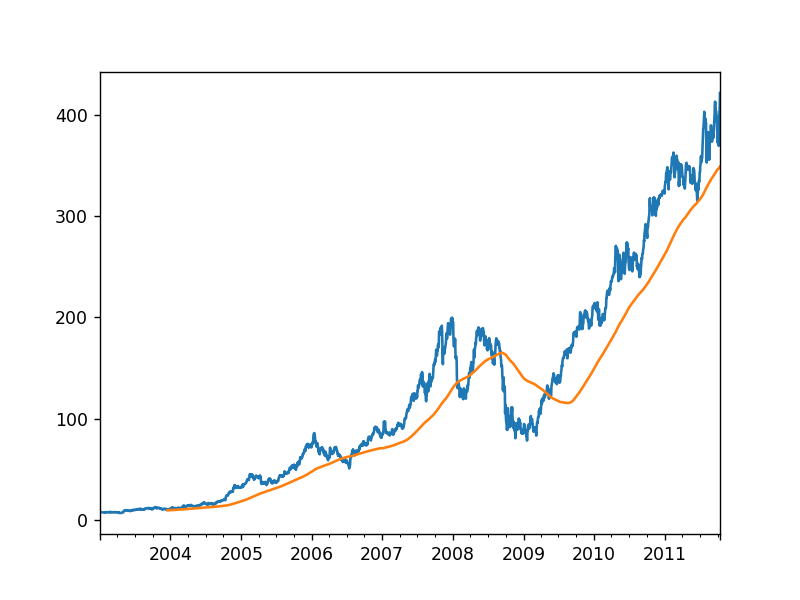

<IPython.core.display.Javascript object>


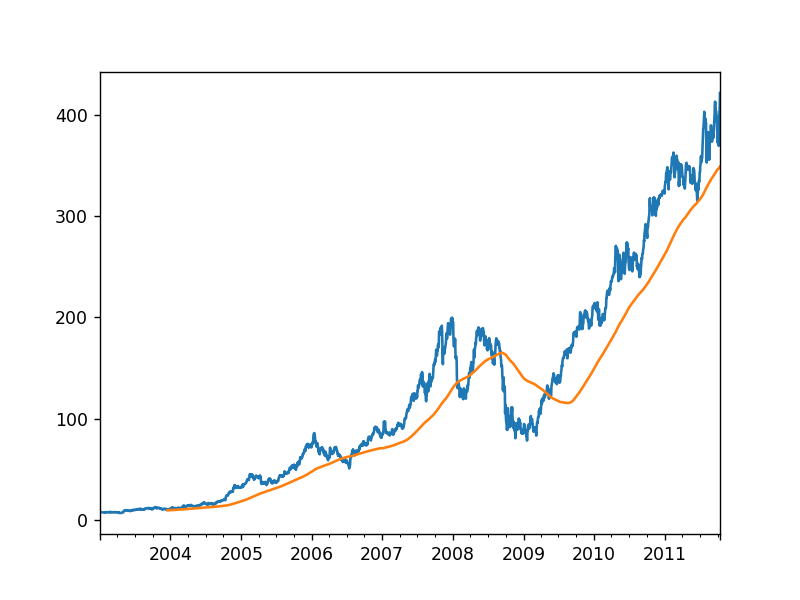

In [88]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.figure()

In [89]:
close_px.AAPL.plot()

In [90]:
close_px.AAPL.rolling(250).mean().plot()

表达式rolling(250)与groupby很像，但不是对其进行分组，而是创建一个按照250天分组的滑动窗口对象。然后，我们就得到了苹果公司股价的250天的移动窗口。

默认情况下，rolling函数需要窗口中所有的值为非NA值。可以修改该行为以解决缺失数据的问题。其实，在时间序列开始处尚不足窗口期的那些数据就是个特例（见图11-5）：

In [91]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<IPython.core.display.Javascript object>


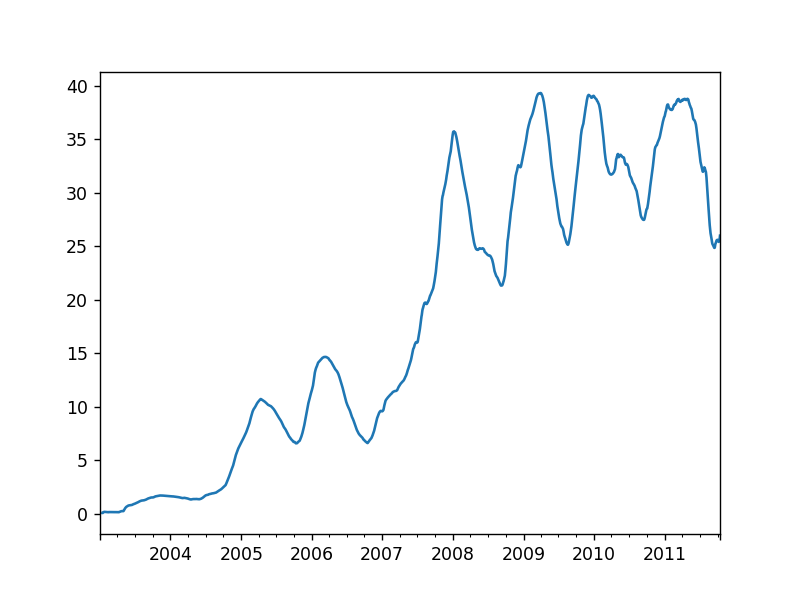

In [92]:
plt.figure()

appl_std250.plot()

要计算扩展窗口平均（expanding window mean），可以使用expanding而不是rolling。“扩展”意味着，从时间序列的起始处开始窗口，增加窗口直到它超过所有的序列。apple_std250时间序列的扩展窗口平均如下所示：

In [93]:
expanding_mean = appl_std250.expanding().mean()

对DataFrame调用rolling_mean（以及与之类似的函数）会将转换应用到所有的列上（见图11-6）：

<IPython.core.display.Javascript object>


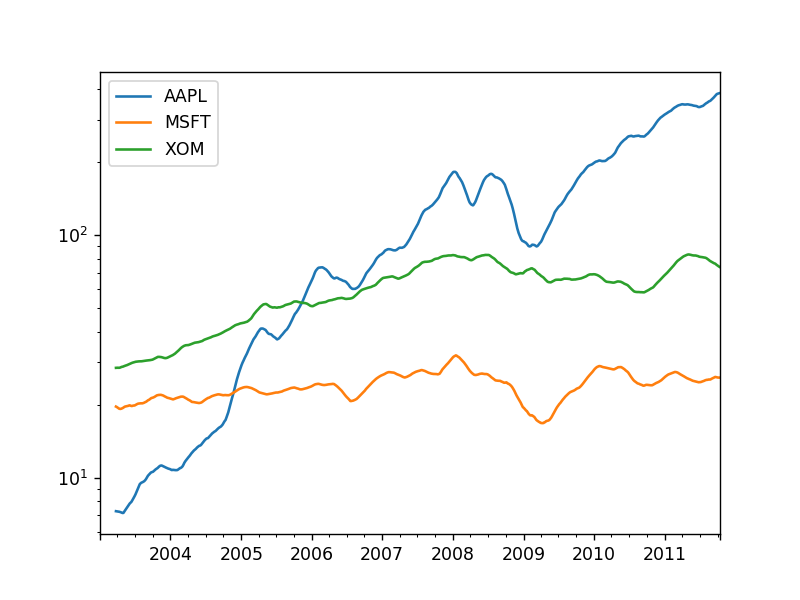

In [94]:
close_px.rolling(60).mean().plot(logy=True)

rolling函数也可以接受一个指定固定大小时间补偿字符串，而不是一组时期。这样可以方便处理不规律的时间序列。这些字符串也可以传递给resample。例如，我们可以计算20天的滚动均值，如下所示：

In [96]:
close_px.rolling('20D').mean().head()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000


### 11.7.1 指数加权函数

### 11.7.2 二元移动窗口函数

### 11.7.3 用户定义的移动窗口函数